## Intel Scene Classififcation

### The given dataset has different scenes as below
1.buildings
2.forest
3.glacier
4.mountain
5.sea
6.street

For each sceens, it has individual set of pictures, for to train and the test model.

This model uses CV2 Image read option to get the HOG features of the Image.
We will be using Linear SVC for better accurancy and performance

### Lets import the necesassary libraries and then images

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2

from tqdm import tqdm
import random as rn
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

from skimage import feature, color, data
from sklearn.preprocessing import LabelEncoder

#### This dataset has 6 categories with owen set of images for Train & test model. So, lets import the train & test images seperatly

In [2]:
# The training data set is in the /Volumes/Arun⁩/Machine Learning⁩/Final Project⁩/Intel Image Classification/seg_train
trn_img_path = "/Users/macos/Documents/Intel Image Classification/seg_train"
print(os.listdir(trn_img_path))

# The testing data set is in the /Volumes/Arun⁩/Machine Learning⁩/Final Project⁩/Intel Image Classification/seg_test
tst_img_path = "/Users/macos/Documents/Intel Image Classification/seg_test"
print(os.listdir(tst_img_path))

['forest', 'buildings', '.DS_Store', 'Icon\r', 'glacier', 'street', 'mountain', 'sea']
['forest', 'buildings', '.DS_Store', 'Icon\r', 'glacier', 'street', 'mountain', 'sea']


#### Lets assign the path of test & train images sepratly for each categories and then defines the necesary arrays to store the needed information

In [3]:
#assign the path variable of training image category directories
trn_buildings_dir = "/Users/macos/Documents/Intel Image Classification/seg_train/buildings"
trn_forest_dir = "/Users/macos/Documents/Intel Image Classification/seg_train/forest"
trn_glacier_dir = "/Users/macos/Documents/Intel Image Classification/seg_train/glacier"
trn_mountain_dir = "/Users/macos/Documents/Intel Image Classification/seg_train/mountain"
trn_sea_dir = "/Users/macos/Documents/Intel Image Classification/seg_train/sea"
trn_street_dir = "/Users/macos/Documents/Intel Image Classification/seg_train/street"

#assign the path variable of testing image category directories
tst_buildings_dir = "/Users/macos/Documents/Intel Image Classification/seg_test/buildings"
tst_forest_dir = "/Users/macos/Documents/Intel Image Classification/seg_test/forest"
tst_glacier_dir = "/Users/macos/Documents/Intel Image Classification/seg_test/glacier"
tst_mountain_dir = "/Users/macos/Documents/Intel Image Classification/seg_test/mountain"
tst_sea_dir = "/Users/macos/Documents/Intel Image Classification/seg_test/sea"
tst_street_dir = "/Users/macos/Documents/Intel Image Classification/seg_test/street"

# Lets create 2 set of arrays for train & testing data's. One for to store the Image data and anther one for label details
X_train_image = [] #Stores the training Image file info
X_train_data =[] # Stores the training image data
Z_train = [] # Stores the training image label

X_test_image = [] # Stores the testing image file info
X_test_data = [] # Stores the testing image data
Z_test = [] # Stores the testing image label

#### Create a function to load the image file and store the hog feature from it into train & test data's respectively

In [4]:
# Lets define a function to store the image data and label for it
def image_data (scene_type, scene_path, data_type):
    for img in tqdm(os.listdir(scene_path)):
        img_path = os.path.join(scene_path,img)
        if img_path.endswith('.jpg'):
            img_data = cv2.imread(img_path)
            img_data = cv2.resize(img_data,(100,100))
            image_size = img_data.shape
            if(data_type =='Training'):
                X_train_image.append(feature.hog(img_data))
                Z_train.append(str(scene_type))
            if(data_type =='Testing'):
                X_test_image.append(feature.hog(img_data))
                Z_test.append(np.array(str(scene_type)))

In [5]:
# call the Image_data function for to store training images from each scene

#building images
image_data('Building',trn_buildings_dir,'Training')
print(len(X_train_image))

#forest images
image_data('Forest',trn_forest_dir,'Training')
print(len(X_train_image))

# glacier images
image_data('Glacier',trn_glacier_dir,'Training')
print(len(X_train_image))

# mountain images
image_data('Mountain',trn_mountain_dir,'Training')
print(len(X_train_image))

# sea images
image_data('Sea',trn_sea_dir,'Training')
print(len(X_train_image))

#street images
image_data('Street',trn_street_dir,'Training')
print(len(X_train_image))


  0%|          | 0/2192 [00:00<?, ?it/s]/Users/macos/anaconda3/lib/python3.7/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)
  1%|          | 13/2272 [00:00<00:18, 122.74it/s]

2191


  1%|          | 13/2405 [00:00<00:18, 126.27it/s]

4462


  0%|          | 11/2513 [00:00<00:23, 106.09it/s]

6866


  1%|          | 14/2275 [00:00<00:16, 134.02it/s]

9378


  1%|          | 13/2383 [00:00<00:18, 129.60it/s]

11652


100%|██████████| 2383/2383 [00:16<00:00, 142.40it/s]

14034


In [6]:
# call the Image_data function for to store testing images from each scene

#building images
image_data('Building',tst_buildings_dir,'Testing')
print(len(X_test_image))

#forest images
image_data('Forest',tst_forest_dir,'Testing')
print(len(X_test_image))

# glacier images
image_data('Glacier',tst_glacier_dir,'Testing')
print(len(X_test_image))

# mountain images
image_data('Mountain',tst_mountain_dir,'Testing')
print(len(X_test_image))

# sea images
image_data('Sea',tst_sea_dir,'Testing')
print(len(X_test_image))

#street images
image_data('Street',tst_street_dir,'Testing')
print(len(X_test_image))


  2%|▏         | 8/475 [00:00<00:06, 77.39it/s]

437


  3%|▎         | 14/554 [00:00<00:04, 134.72it/s]

911


  2%|▏         | 13/526 [00:00<00:04, 124.28it/s]

1464


  3%|▎         | 15/511 [00:00<00:03, 143.78it/s]

1989


  3%|▎         | 14/502 [00:00<00:03, 137.05it/s]

2499


100%|██████████| 502/502 [00:04<00:00, 120.94it/s]

3000


In [7]:
# Let's encode the lables using Lable Encoder function
le = LabelEncoder()
y_train = le.fit_transform(Z_train)
y_test = le.fit_transform(Z_test)

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import LinearSVC

In [9]:
clf = LinearSVC(random_state=0,tol=1e-5)

In [10]:
clf.fit(X_train_image,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)

In [11]:
clf.coef_

array([[-0.14952981,  0.51578007,  0.81757502, ...,  0.20686268,
        -0.92273199,  1.32071052],
       [ 1.14151274,  2.28278895,  0.49138962, ..., -0.81624716,
         0.42967783, -0.5856686 ],
       [-0.92275934, -0.71199955, -0.00852808, ...,  0.38753086,
         0.31277552, -0.1768392 ],
       [ 0.34443455, -0.41104229, -0.06190752, ..., -0.43986414,
         0.48971522, -0.58334239],
       [-0.66786493,  0.63940026,  0.39961304, ..., -0.2197787 ,
        -0.09206694, -0.32037212],
       [-0.24167394, -0.96161521, -1.83544193, ..., -0.12586686,
         0.40624017, -0.10714503]])

In [12]:
clf.intercept_

array([-0.45321554,  0.22853019, -0.30012723, -0.34513473, -0.50847155,
       -0.72995518])

In [13]:
# filter all the warnings
import warnings
warnings.filterwarnings('ignore')

# 10-fold cross validation
clf_score = clf.score(X_test_image,y_test)
print('Score', clf_score)
kfold = KFold(n_splits=10, random_state=7)
cv_results = cross_val_score(clf, X_train_image, y_train, cv=kfold, scoring="accuracy")
print(cv_results)

Score 0.6776666666666666
[0.46794872 0.7514245  0.77492877 0.4537037  0.37063435 0.24518888
 0.46115467 0.37633642 0.62366358 0.54526016]


In [14]:
print(cv_results.mean(), cv_results.std())

0.5070243759302919 0.16040084273443536


#### Predict the scene classification for some random image

In [15]:
label=['Building','Forest', 'Glacier','Mountain','Sea','Street']

#### Scene_predict function will get the hog feature from the image and predict the scene and then print it

In [16]:
def scene_predictor(img_path):
    image = cv2.imread(img_path)# image read using cv2 for scene prediction
    ip_image = Image.open(img_path) # image read using Image open just to display the source
    prd_image = cv2.resize(image,(100,100))
    prd_image_data = feature.hog(prd_image)
    scene = clf.predict(prd_image_data.reshape(1, -1))[0]
    fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
    cv2.putText(image, label[scene],(10,20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,102), 3)

    ax[0].imshow(ip_image)
    ax[0].set_title('input image')

    ax[1].imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    ax[1].set_title('with Scene Classification');

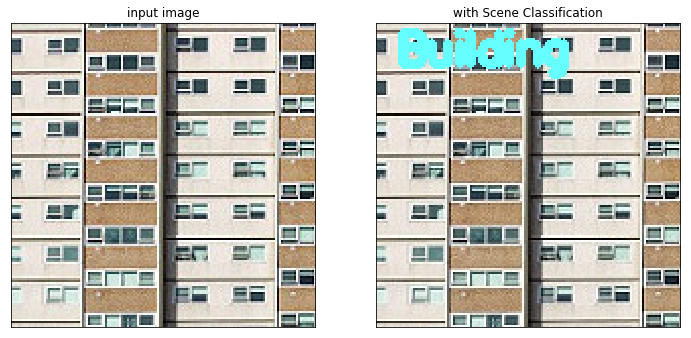

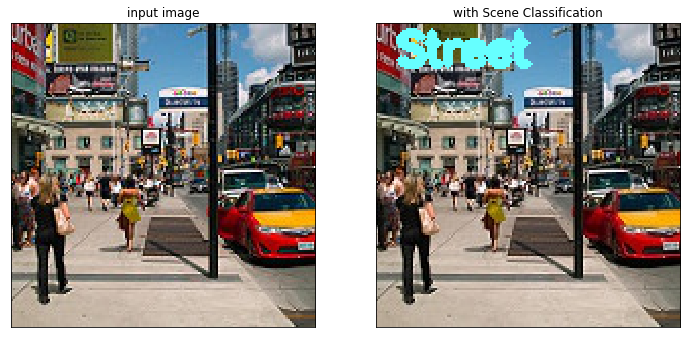

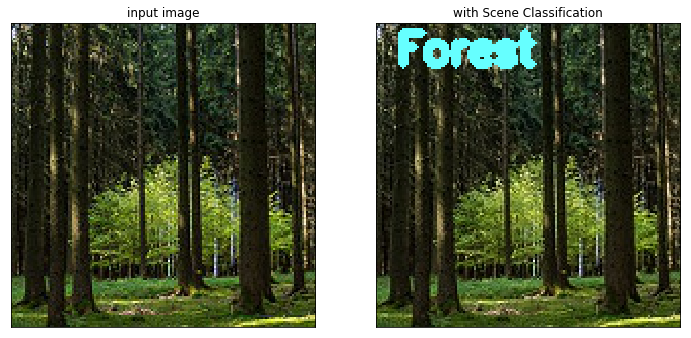

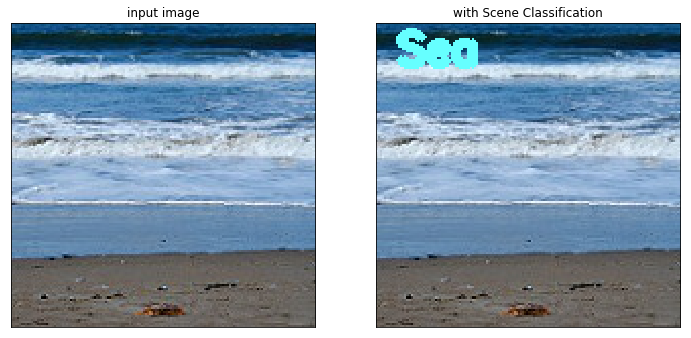

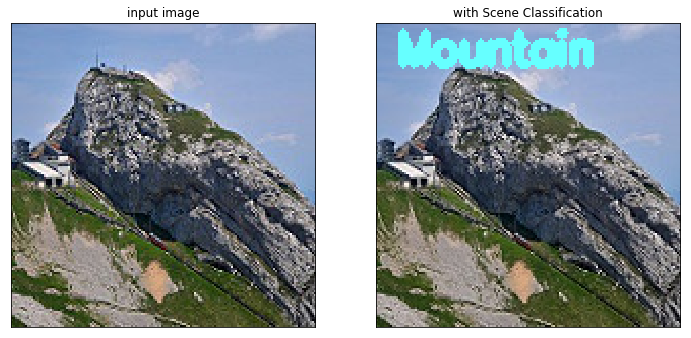

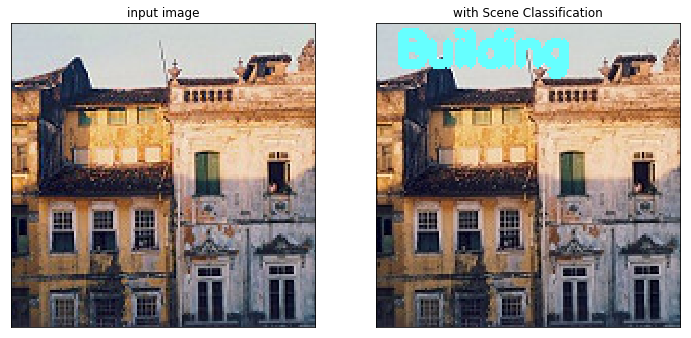

In [17]:
ip_img_folder = '/Users/macos/Documents/Intel Image Classification/seg_pred/'
ip_img_files = ['222.jpg','121.jpg','88.jpg','398.jpg','839.jpg', '520.jpg']
scene_predicted = [scene_predictor(os.path.join(ip_img_folder,img_file))for img_file in ip_img_files]

##### Images for which scenes predicted wrongly

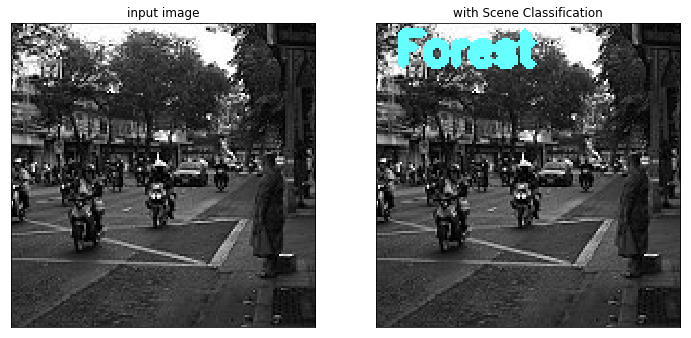

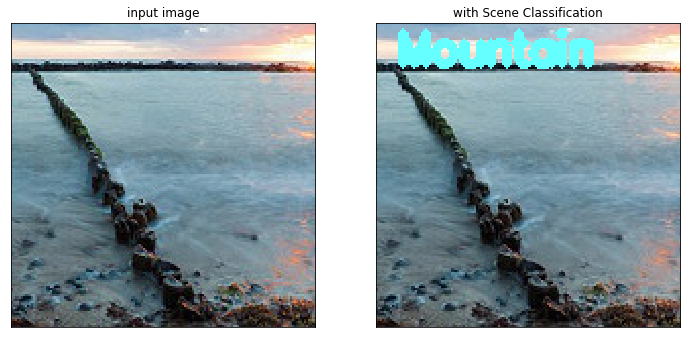

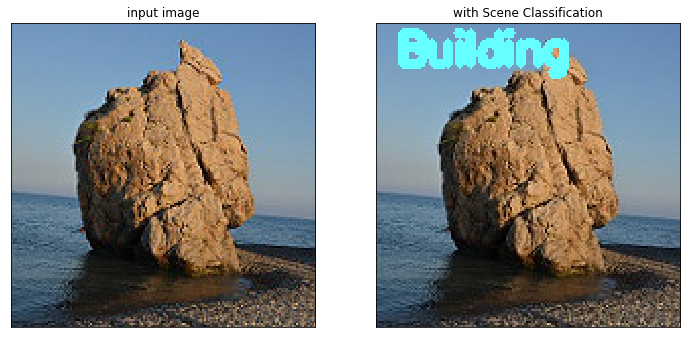

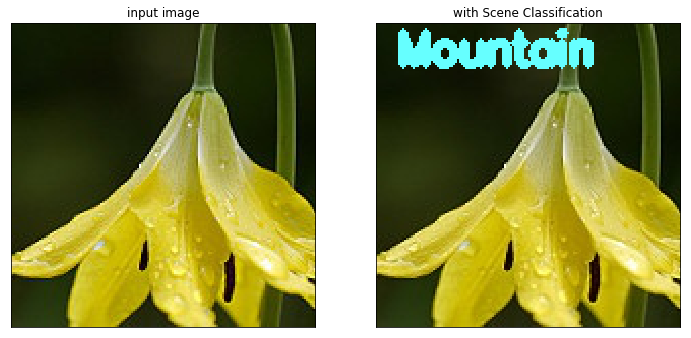

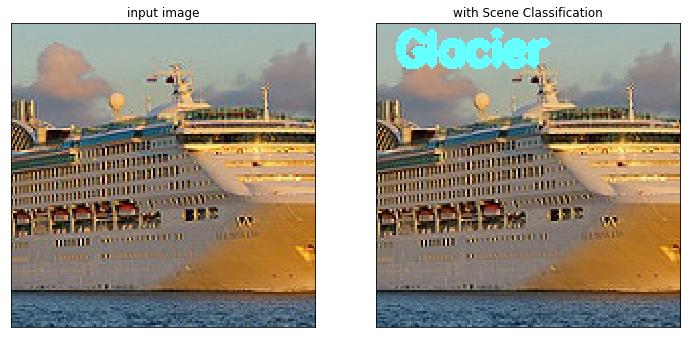

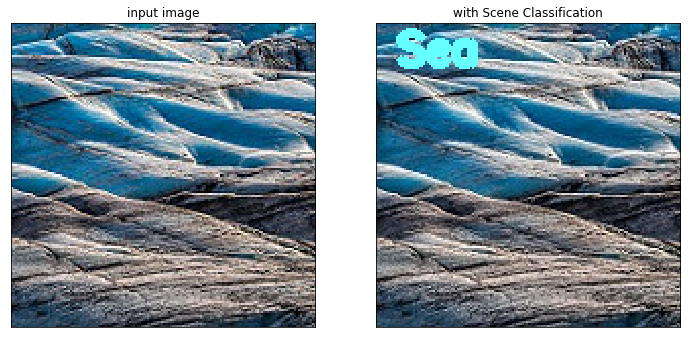

In [18]:
wrong_scene_files = ['3.jpg','6.jpg','132.jpg','828.jpg','1688.jpg','4784.jpg']
wrong_scene_predicted = [scene_predictor(os.path.join(ip_img_folder,img))for img in wrong_scene_files]

#### By using the PCA, we can fine tune the model , for to improve the efficiancy

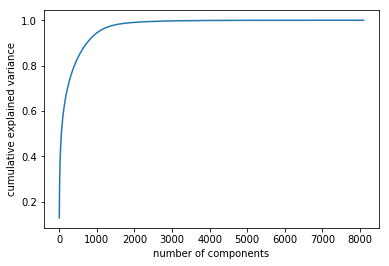

In [19]:
# Import PCA
from sklearn.decomposition import PCA
#  Lets plot Cumulative explained vairance, for to figure out the optimal no of components
pca = PCA().fit(X_train_image)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [20]:
pca = PCA(n_components=3000)
pca.fit(X_train_image)
X_train_pca = pca.transform(X_train_image)
X_test_pca = pca.transform(X_test_image)
clf = clf.fit(X_train_pca,y_train)
y_pred = clf.predict(X_test_pca)

In [21]:
clf_score_test = clf.score(X_test_pca,y_test)
print('Score - Test', clf_score_test)

Score - Test 0.6786666666666666


In [22]:
clf.predict(X_test_pca[:20])
# y_test[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 5, 5, 0, 0])

In [23]:
img_1 = cv2.imread('/Users/macos/Documents/Intel Image Classification/seg_pred/121.jpg')
img_1=cv2.resize(img_1,(100,100))
prd_img_1 = feature.hog(img_1)
prd_img_pca_1 = pca.transform(prd_img_1.reshape(1,-1))
scene_1= clf.predict(prd_img_pca_1)
print(label[scene_1[0]])

Street


In [24]:
prd_img_pca_1.shape

(1, 3000)

In [25]:
prd_img_1.shape

(8100,)

In [27]:
def scene_predictor_with_pca(img_path):
    input_img = cv2.imread(img_path)# image read using cv2 for scene prediction
    inp_img = Image.open(img_path) # image read using Image open just to display the source
    prd_img = cv2.resize(input_img,(100,100))
    prd_img_data = feature.hog(prd_img)
    prd_img_pca = pca.transform(prd_img_data.reshape(1,-1))
    scene = clf.predict(prd_img_pca)[0]
    fig, ax = plt.subplots(1, 2, figsize=(12, 6),subplot_kw=dict(xticks=[], yticks=[]))
    cv2.putText(input_img, label[scene],(10,20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,102), 3)

    ax[0].imshow(inp_img)
    ax[0].set_title('input image')

    ax[1].imshow(cv2.cvtColor(input_img,cv2.COLOR_BGR2RGB))
    ax[1].set_title('with Scene Classification');

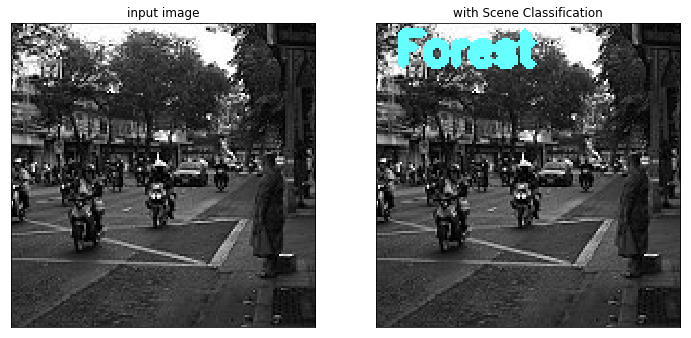

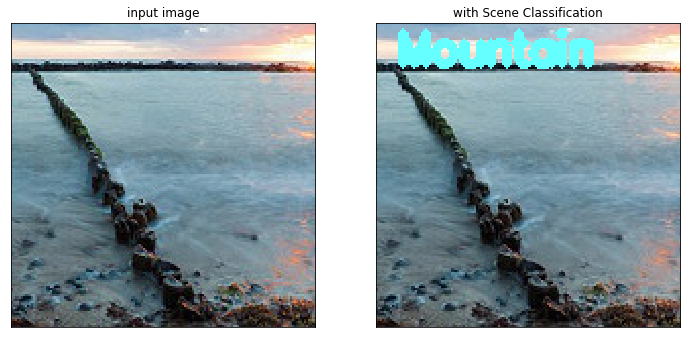

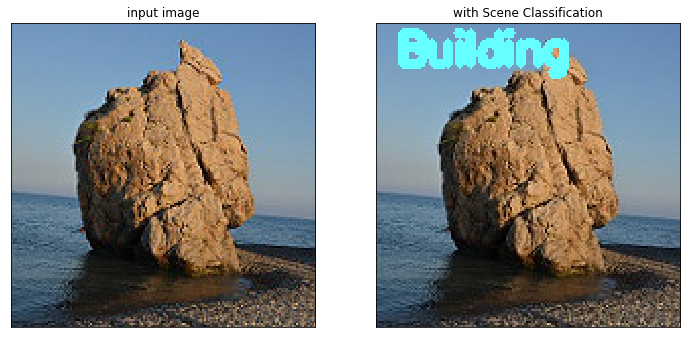

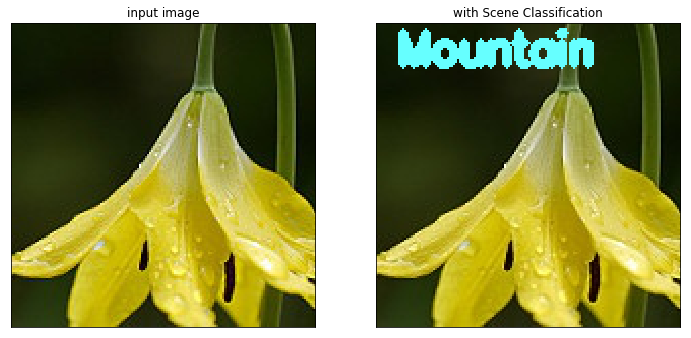

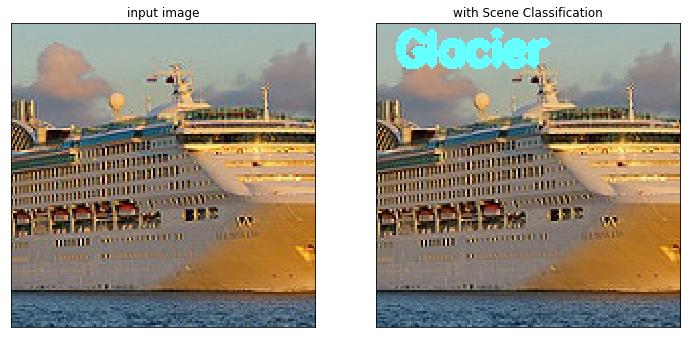

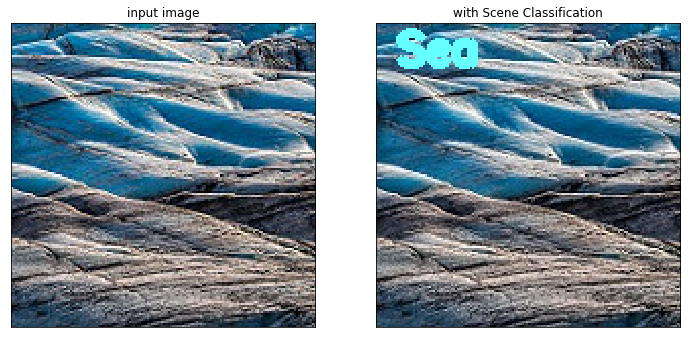

In [28]:
wrong_scene_files = ['3.jpg','6.jpg','132.jpg','828.jpg','1688.jpg','4784.jpg']
wrong_scene_predicted = [scene_predictor_with_pca(os.path.join(ip_img_folder,img))for img in wrong_scene_files]

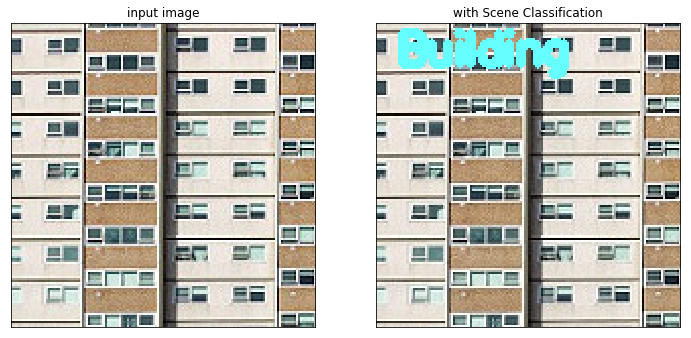

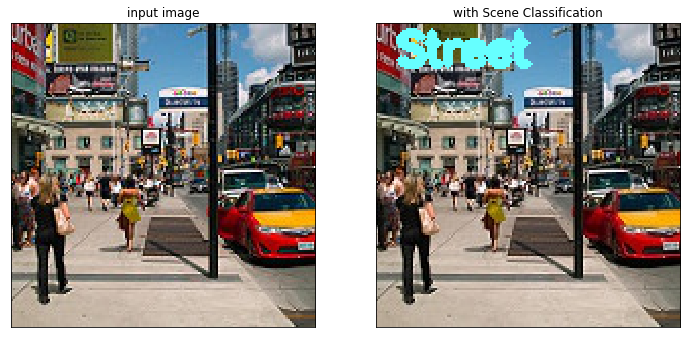

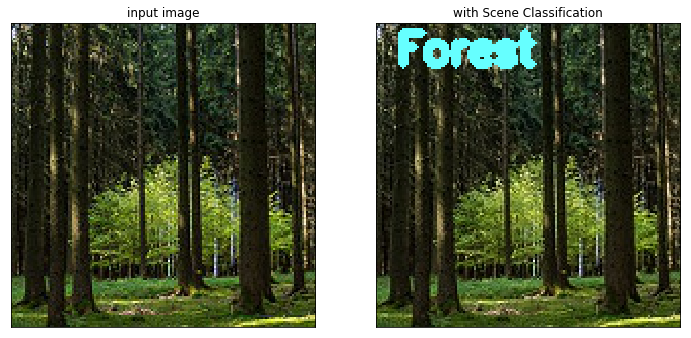

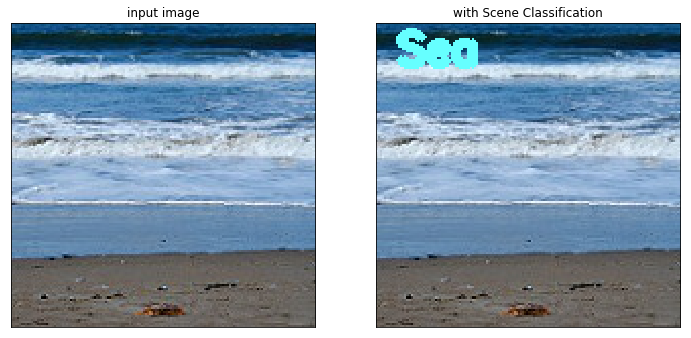

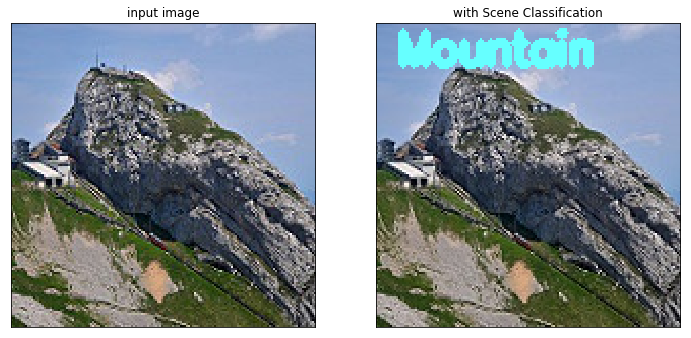

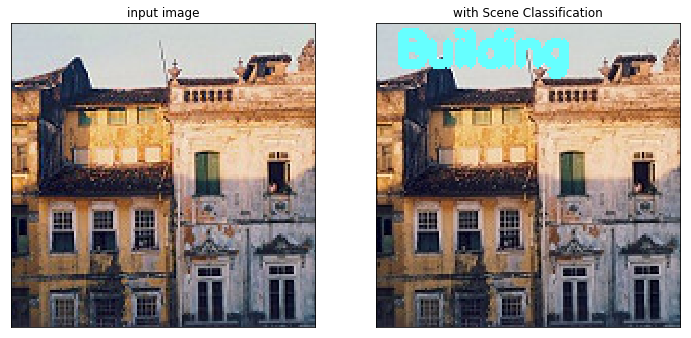

In [29]:
ip_img_files = ['222.jpg','121.jpg','88.jpg','398.jpg','839.jpg', '520.jpg']
scene_predicted = [scene_predictor_with_pca(os.path.join(ip_img_folder,img_file))for img_file in ip_img_files]